# Final Project Template 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

Provides census data for all tracks 

The Hollywood Music Dataset is found at the link below but has also been added as part of this online notebook

https://www.kaggle.com/muonneutrino/us-census-demographic-data

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

#read in the happiness spreadsheet 

In [11]:
happiness= "happiness2015.csv"

In [12]:
import pandas as pd
import sklearn
import numpy as np 

In [13]:
#use pandas to read in the data files since its csv
happiness_df= pd.read_csv(happiness, sep=',', header=0)

## 4) Show me the head of your data.

In [15]:
#show the head for the happiness dataset

happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## 5) Show me the shape of your data

In [17]:
#show the shpe of the dataset
print(happiness_df.shape)

(158, 12)


## 6) Show me the proportion of missing observations for each column of your data

In [18]:
#show the mssing observations in each column of the happiness dataset 
happiness_df.dropna().isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

initial data explortion of the census data 

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f569f25eef0>,
      dtype=object)

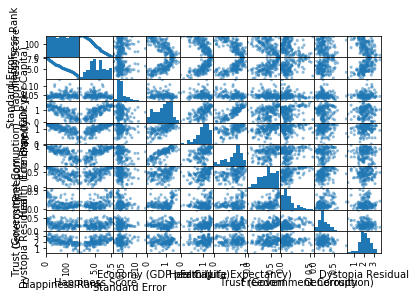

In [21]:
scatter_matrix(happiness_df)

In [23]:
import seaborn as sns


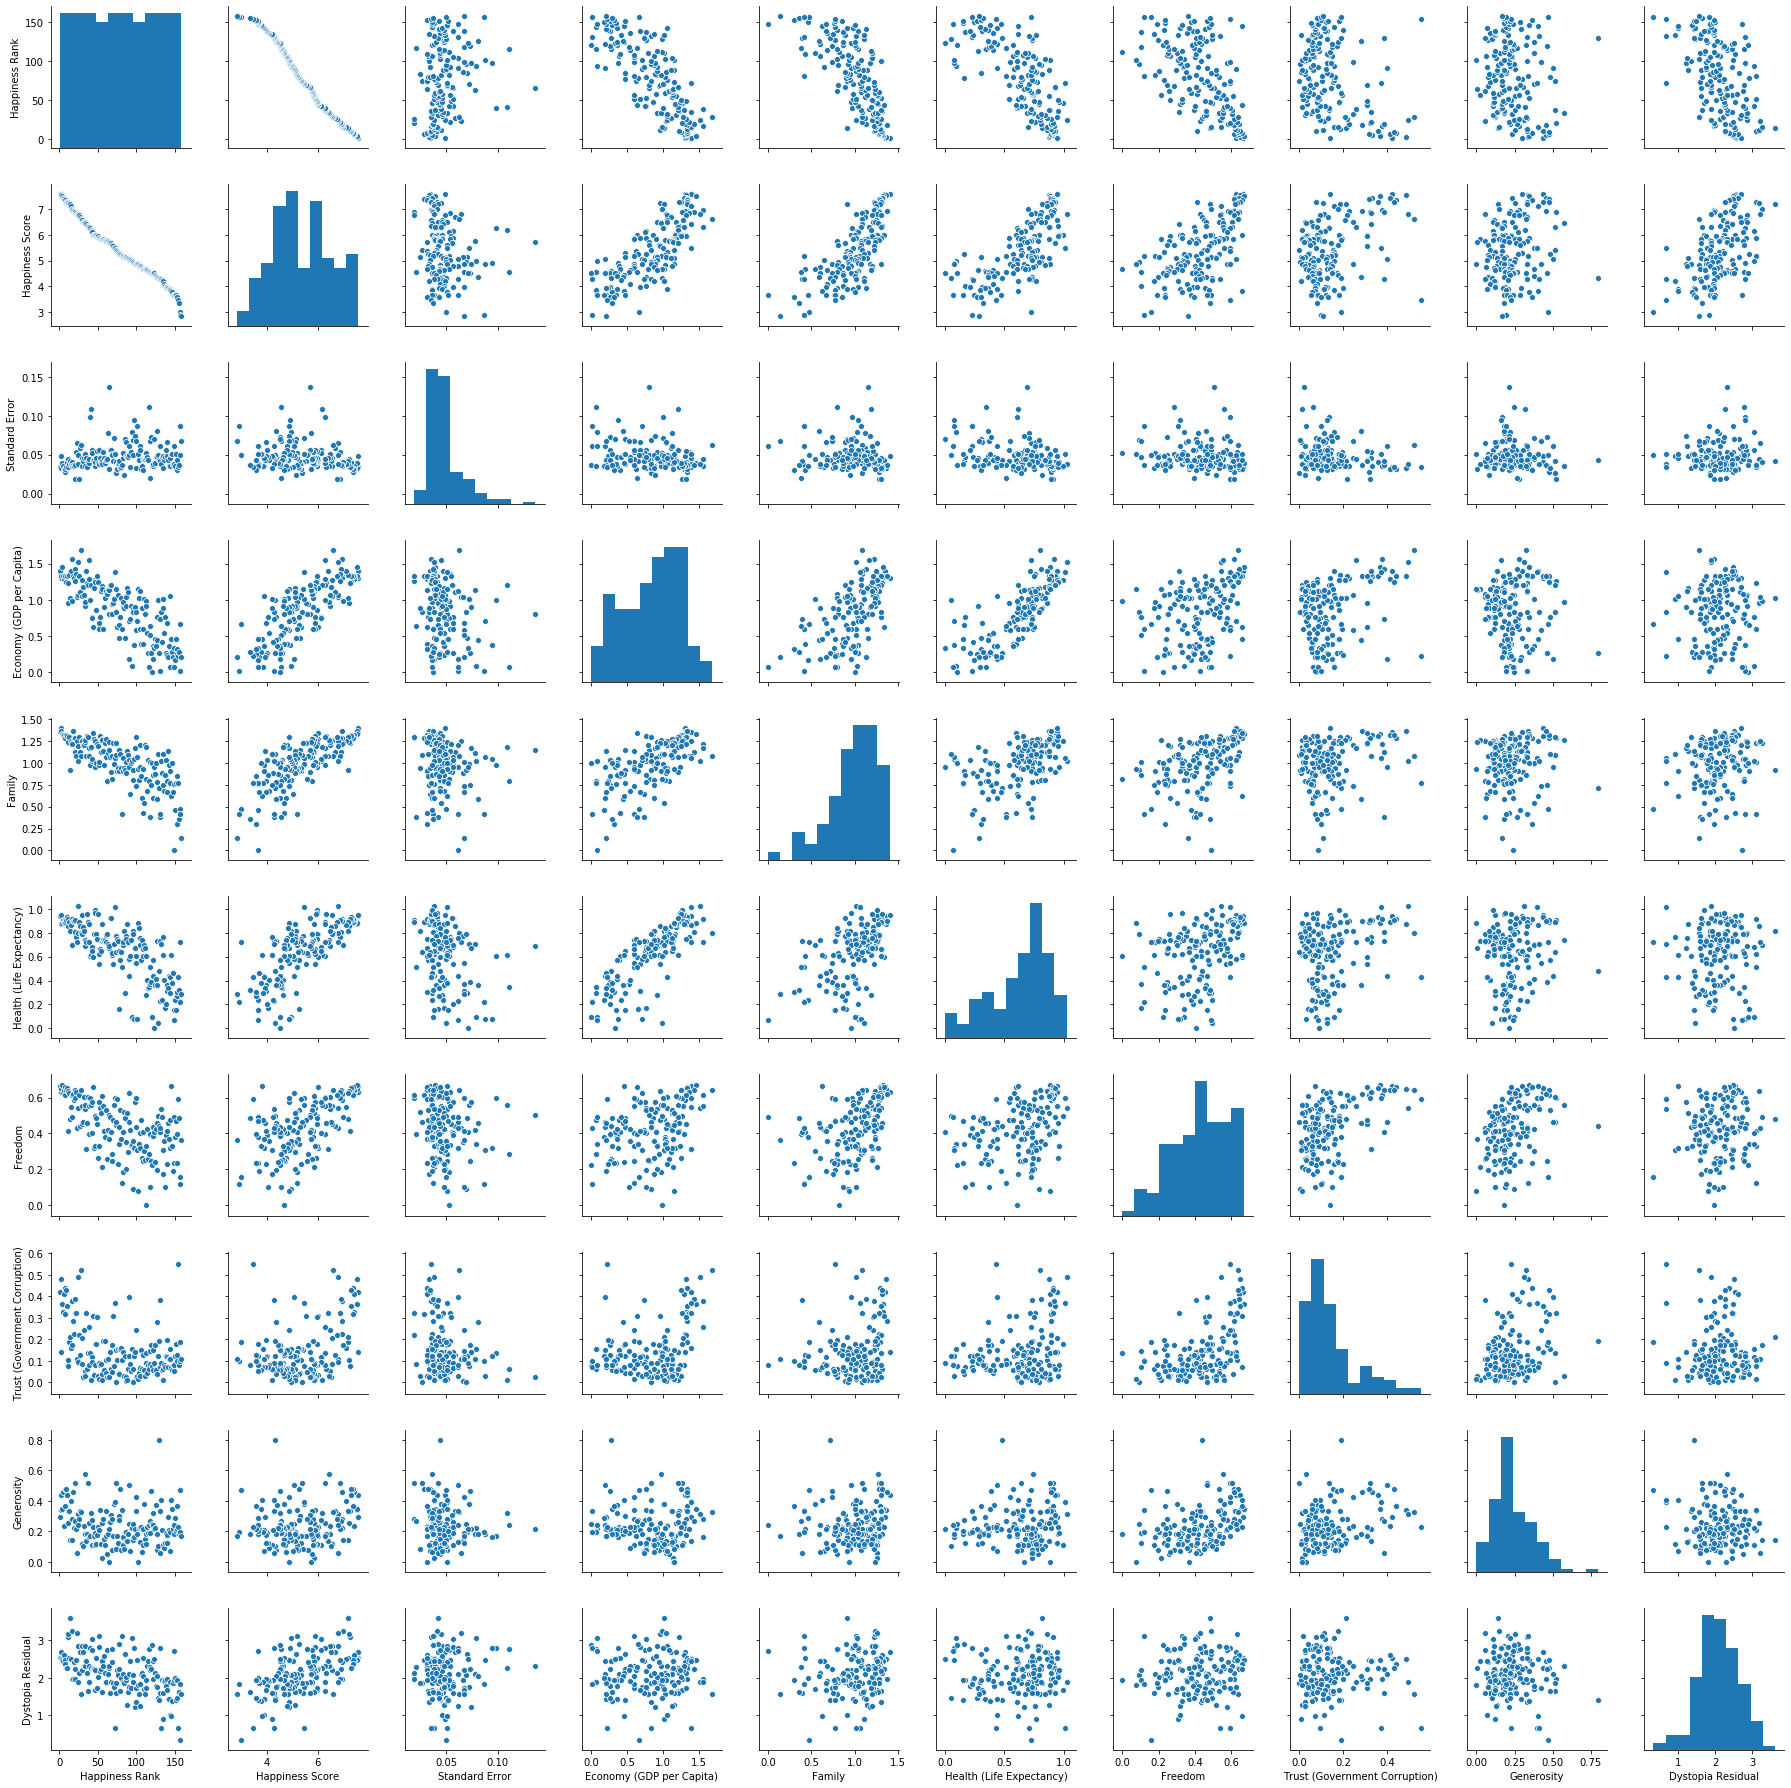

In [24]:
sns.pairplot(happiness_df)

In [ ]:
#plot an overall correlation matrix between the different attributes
#use the seaborn package 


In [13]:
plotCorrelationMatrix(census_df, 8)

NameError: name 'plotCorrelationMatrix' is not defined

In [7]:
plotPerColumnDistribution(Hollywood, 10, 5)

NameError: name 'plotPerColumnDistribution' is not defined

In [27]:
from sklearn.utils import Bunch
from sklearn.datasets import fetch_species_distributions
from sklearn import svm, metrics

In [31]:
species

<function sklearn.datasets.species_distributions.fetch_species_distributions(data_home=None, download_if_missing=True)>

In [3]:
#explore the datq

from sklearn.svm import SVC
X= Hollywood.data
y=Hollywood.target

classifier=SVC(kernal="rbf")
classifier.fit(X,y)
predictions= classifier.predict(X)

AttributeError: 'str' object has no attribute 'data'

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?